In [1]:
import prepare as p

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

#### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [4]:
df=p.store_data()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,January,Tuesday,13.84
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,27.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,January,Tuesday,41.64
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,49.39
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,34.74


In [11]:
df.reset_index().sale_date.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

### Splitting data
human based

In [238]:
df=df.resample('M')

In [239]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

AttributeError: 'DatetimeIndexResampler' object has no attribute 'shape'

In [16]:
train = df.loc[:'2016']
test = df.loc['2017':]

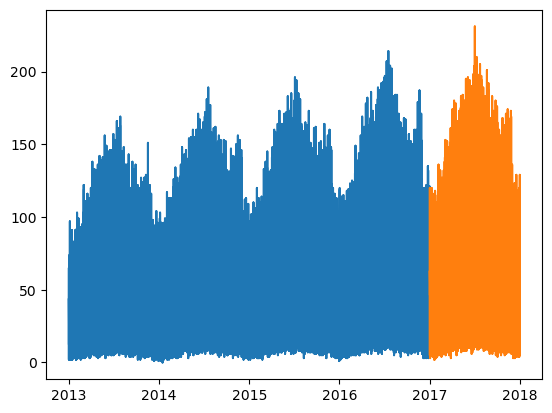

In [17]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.show()

In [24]:
train.reset_index().groupby('sale_date').mean()

,item,sale_amount,sale_id,store,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode,month,sales_total
sale_date,,,,,,,,,,,,
2013-01-01,25.50,27.392,455588.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,32.5524
2013-01-02,25.50,27.356,455589.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,32.5164
2013-01-03,25.50,28.976,455590.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,34.1364
2013-01-04,25.50,31.354,455591.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,36.5144
2013-01-05,25.50,32.474,455592.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,37.6344
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-28,25.50,63.078,456862.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,6.0,68.2384
2016-06-29,25.50,63.276,456863.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,6.0,68.4364
2016-06-30,25.50,67.664,456864.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,6.0,72.8244


item


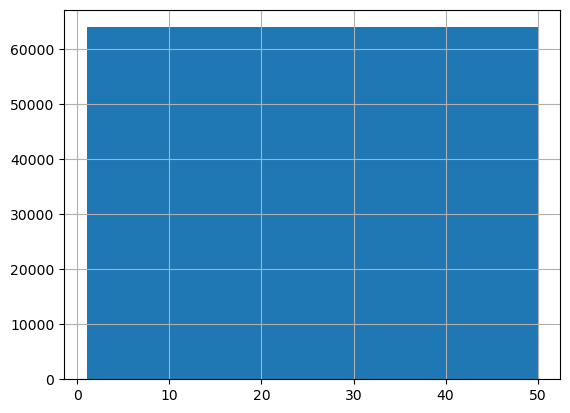

sale_amount


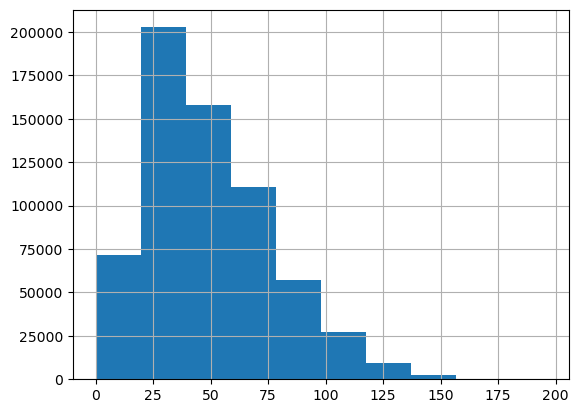

sale_id


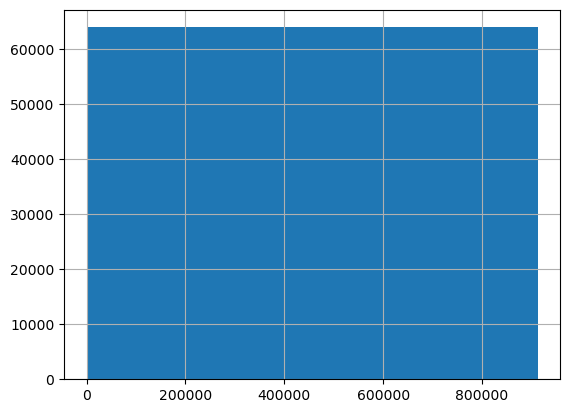

store


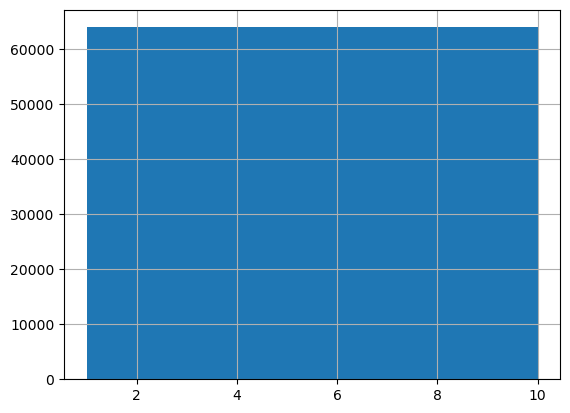

item_brand


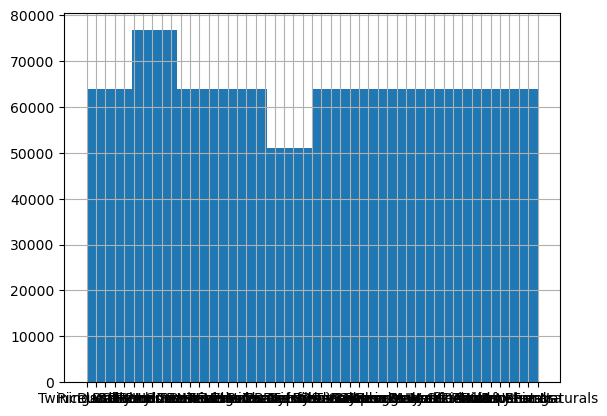

item_id


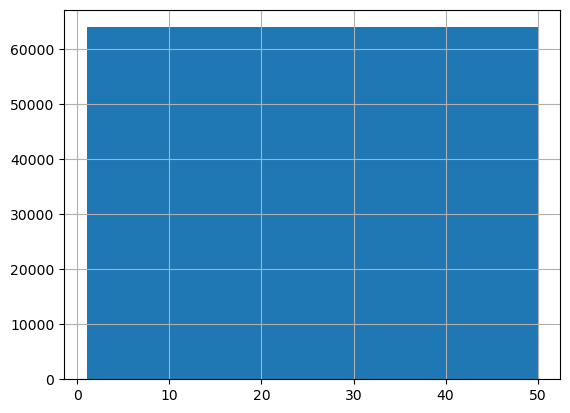

item_name


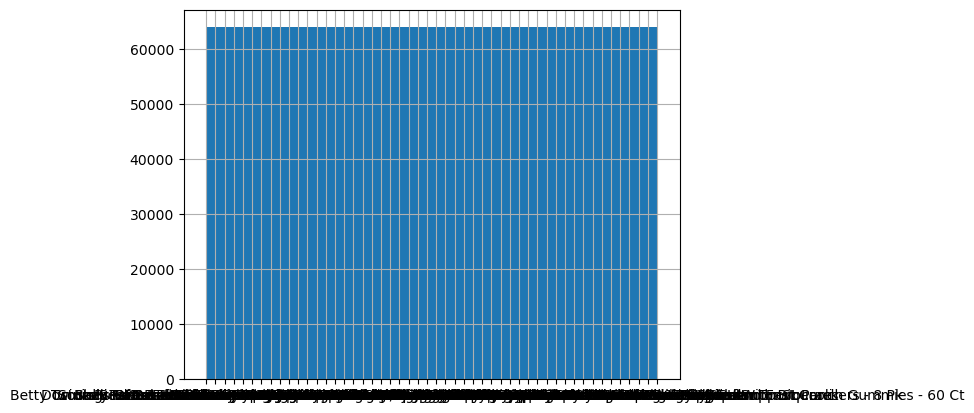

item_price


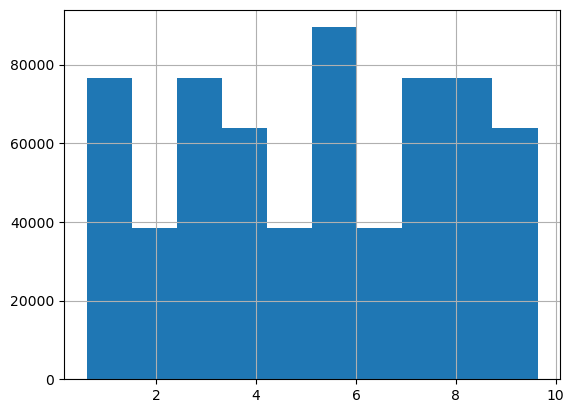

item_upc12


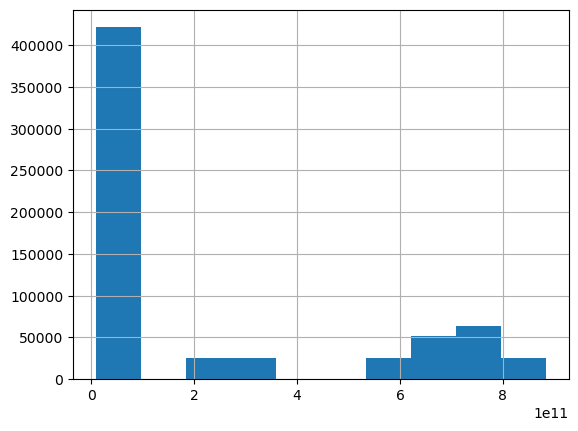

item_upc14


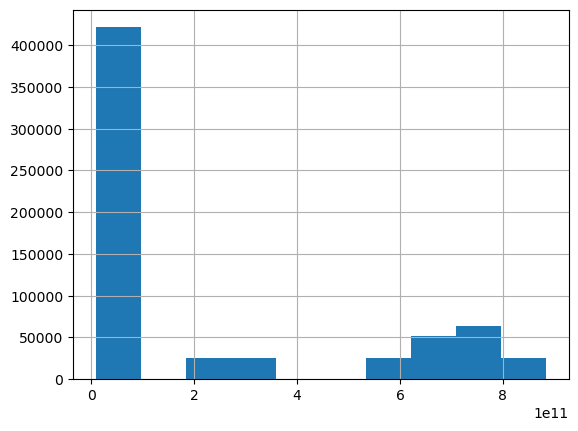

store_address


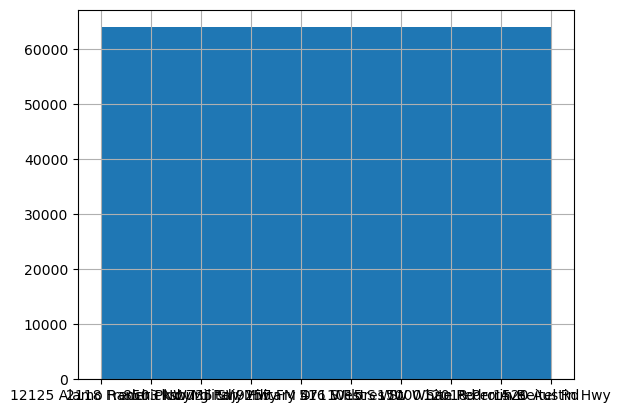

store_city


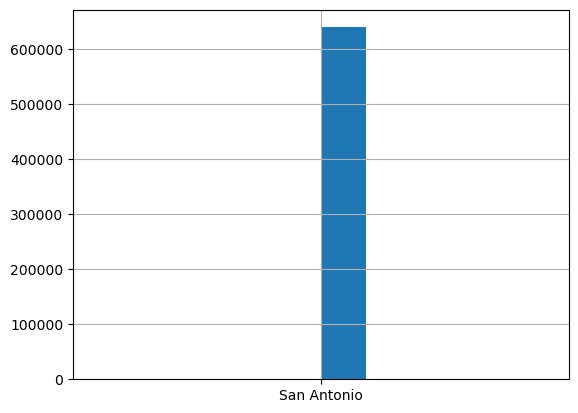

store_id


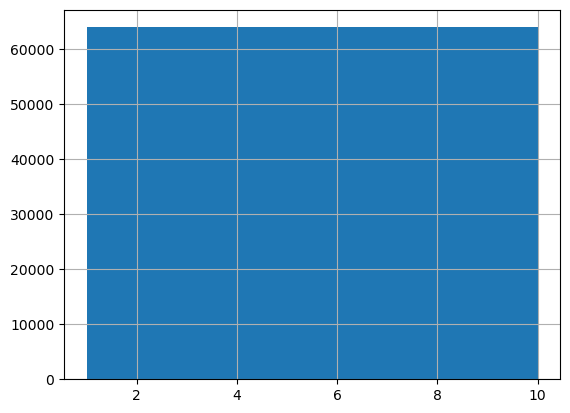

store_state


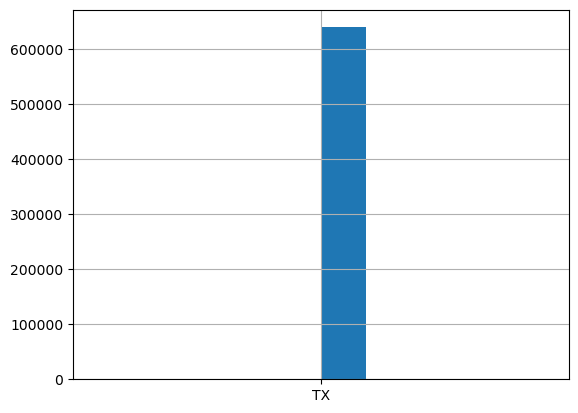

store_zipcode


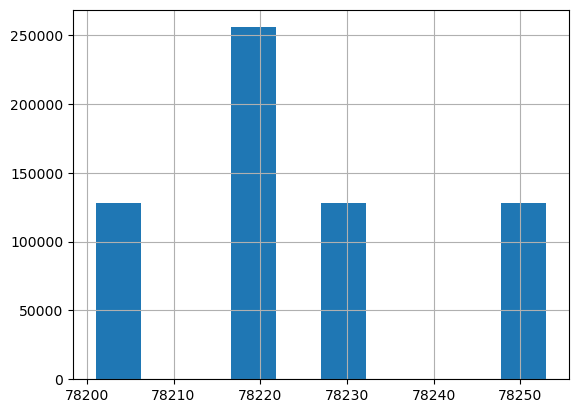

month


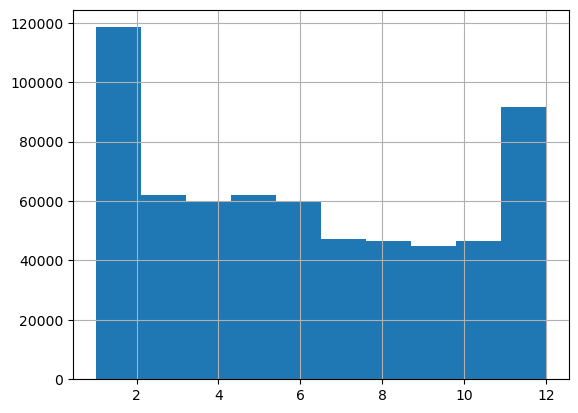

month_name


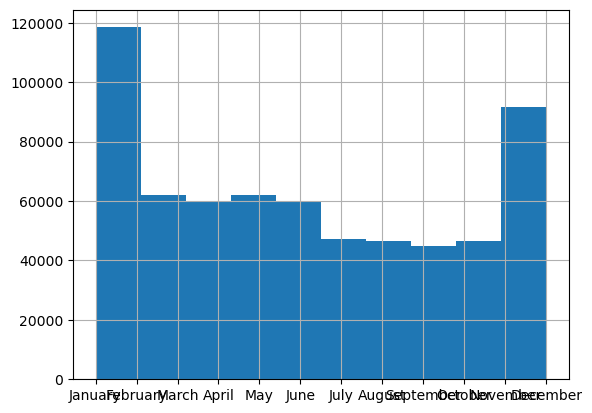

day_of_week


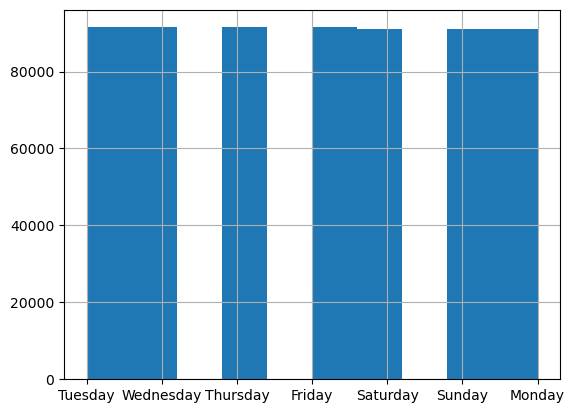

sales_total


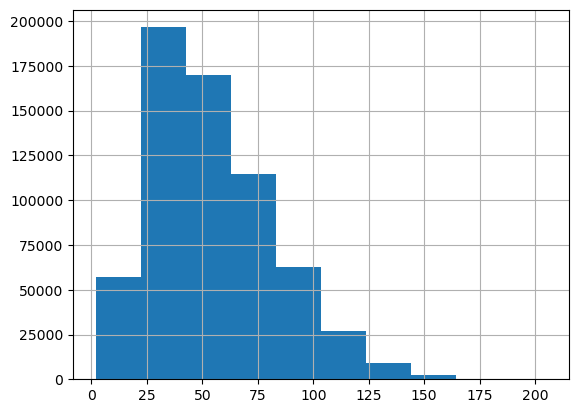

In [26]:
for col in train.columns:
    print(col)
    train[col].hist()
    plt.show()

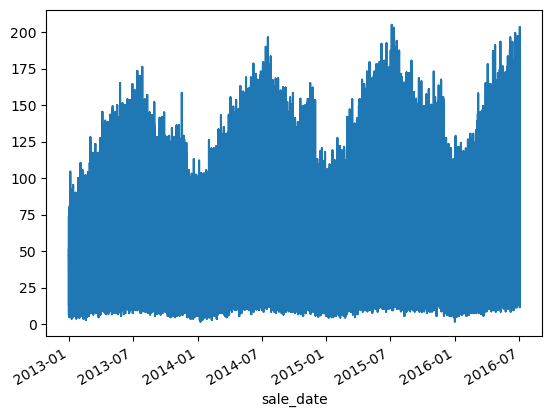

In [29]:
train.sales_total.plot();

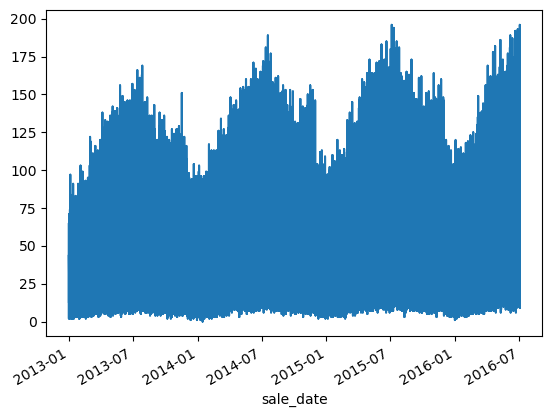

In [31]:
train.sale_amount.plot();

# Average sale amount throughout time

<function matplotlib.pyplot.show(close=None, block=None)>

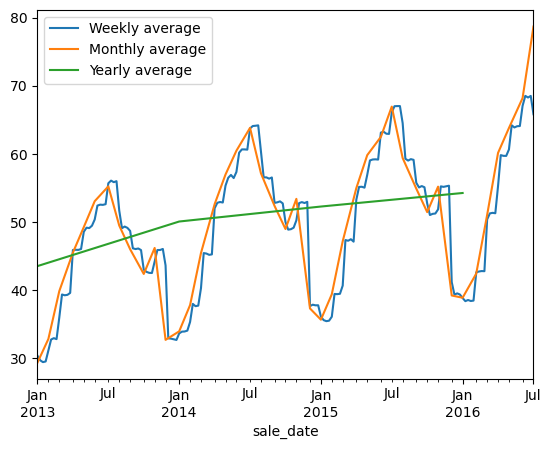

In [48]:
train.sale_amount.resample('W').mean().plot(label='Weekly average')
train.sale_amount.resample('M').mean().plot(label='Monthly average')
train.sale_amount.resample('Y').mean().plot(label='Yearly average')
plt.legend()
plt.show

<AxesSubplot:xlabel='sale_date'>

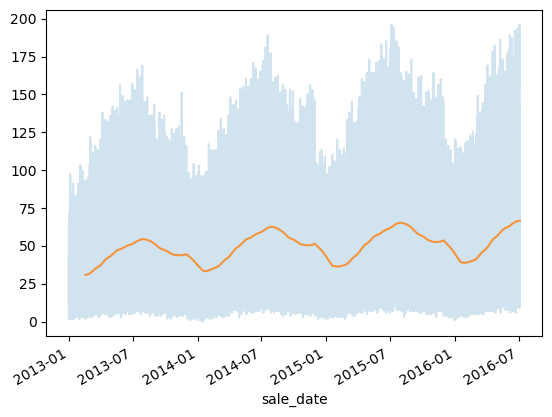

In [42]:
train.sale_amount.plot(alpha=.2, label='Hourly')
train.sale_amount.resample('W').mean().rolling(7).mean().plot(alpha=.8, label='1 week')

In [44]:
train.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,January,Tuesday,13.84
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,27.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,January,Tuesday,41.64
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,49.39
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,34.74


### Month sales over time

<function matplotlib.pyplot.show(close=None, block=None)>

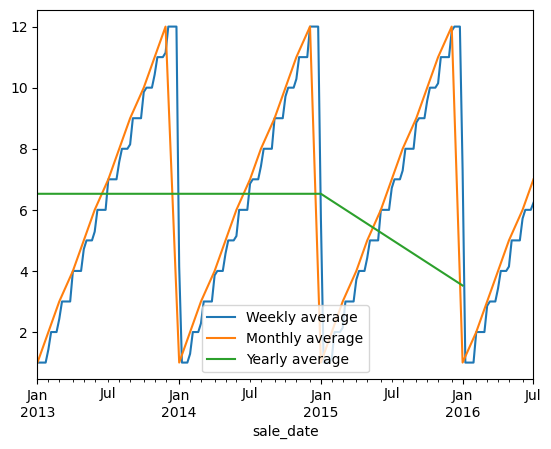

In [47]:
train.month.resample('W').mean().plot(label='Weekly average')
train.month.resample('M').mean().plot(label='Monthly average')
train.month.resample('Y').mean().plot(label='Yearly average')
plt.legend()
plt.show

<AxesSubplot:xlabel='sale_date'>

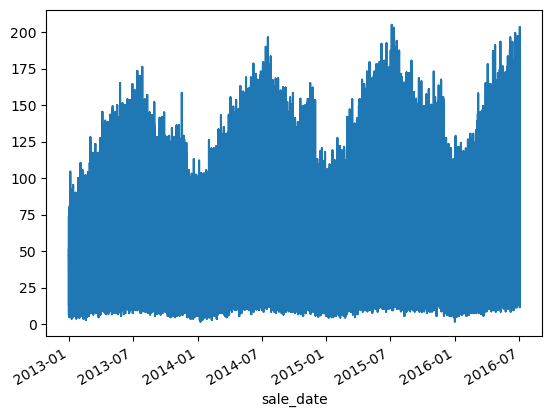

In [55]:
train.sales_total.plot()

In [80]:
train_sales=train[['sales_total']]
train_sales

,sales_total
sale_date,
2013-01-01,13.84
2013-01-01,27.16
2013-01-01,41.64
2013-01-01,49.39
2013-01-01,34.74
...,...
2016-07-02,92.21
2016-07-02,51.43
2016-07-02,112.93


In [87]:
def plot_averages(dataframe, column):
    plt.figure(figsize=(10, 6))

    dataframe[column].resample('W').mean().plot(label='Weekly average')
    dataframe[column].resample('M').mean().plot(label='Monthly average')
    dataframe[column].resample('Y').mean().plot(label='Yearly average')

    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Average')
    plt.title(f'{column} Time Series Averages')

    plt.show()

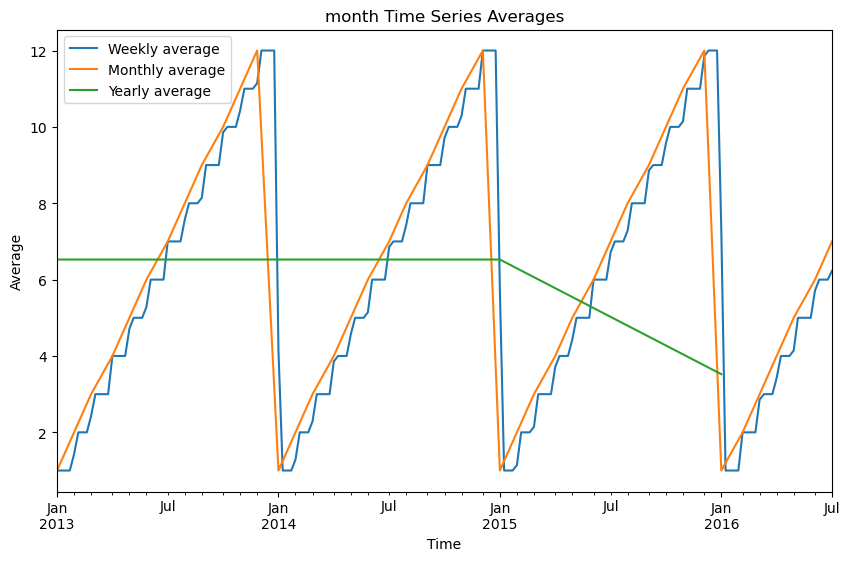

In [92]:
plot_averages(train,'month')

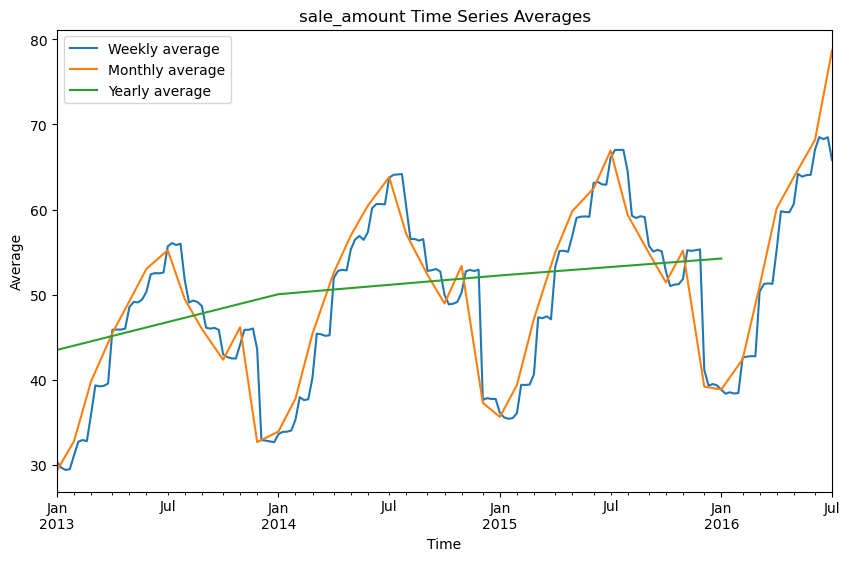

In [89]:
plot_averages(train,'sale_amount')

In [160]:
def heatmap(dataframe):
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe, cmap='YlGnBu')
    plt.title('Heatmap')
    plt.show()

In [170]:
train_sales=train[['sale_amount']]
train_sales=train_sales.resample('D').mean()
train_sales

,sale_amount
sale_date,
2013-01-01,27.392
2013-01-02,27.356
2013-01-03,28.976
2013-01-04,31.354
2013-01-05,32.474
...,...
2016-06-28,63.078
2016-06-29,63.276
2016-06-30,67.664


In [171]:
train_sales.loc[:, 'sale_bin'] = pd.qcut(train_sales['sale_amount'], 3, labels=['low', 'med', 'high'])
train_sales

,sale_amount,sale_bin
sale_date,,
2013-01-01,27.392,low
2013-01-02,27.356,low
2013-01-03,28.976,low
2013-01-04,31.354,low
2013-01-05,32.474,low
...,...,...
2016-06-28,63.078,high
2016-06-29,63.276,high
2016-06-30,67.664,high


In [193]:
train_sales.groupby('sale_bin').resample('M').size()

sale_bin  sale_date 
low       2013-01-31    31
          2013-02-28    28
          2013-03-31    21
          2013-04-30    14
          2013-05-31     4
                        ..
high      2016-03-31     8
          2016-04-30    26
          2016-05-31    26
          2016-06-30    27
          2016-07-31     2
Length: 119, dtype: int64

In [164]:

heatmap(train_sales)

ValueError: could not convert string to float: 'low'

<Figure size 1000x600 with 0 Axes>

In [192]:
train_sales.groupby('sale_bin').mean()


,sale_amount
sale_bin,
low,36.404689
med,49.066098
high,62.912532


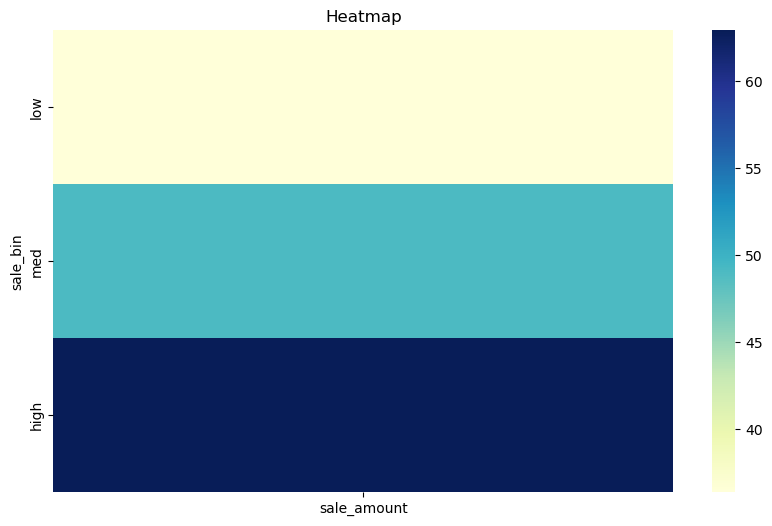

In [166]:
heatmap(train_sales)

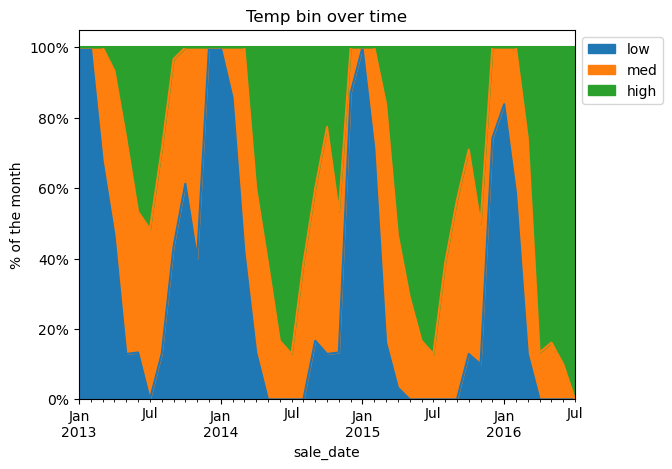

In [172]:
ax = (train_sales.groupby('sale_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Temp bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)

In [174]:
def plot_area(dataframe, bin_column):
    ax = (dataframe.groupby(bin_column)
          .resample('M')
          .size()
          .unstack(0)
          .apply(lambda row: row / row.sum(), axis=1)
          .plot.area(title=f'{bin_column} bin over time', ylabel='% of the month'))
    
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    ax.yaxis.set_major_formatter('{:.0%}'.format)
    plt.show()

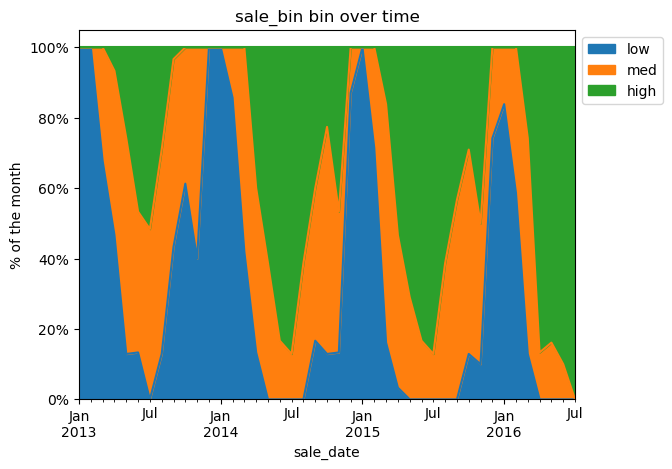

In [175]:
plot_area(train_sales,'sale_bin')


## Insights:
- item_upc14= a 14-digit number used to identify trade items at various packaging levels.
- item_upc12= the barcode representation of the GTIN-12 which consists of twelve numeric characters that uniquely identify a company's individual product.

## OPSD Germany Data

In [194]:
df=p.opsd_data()

<AxesSubplot:xlabel='date'>

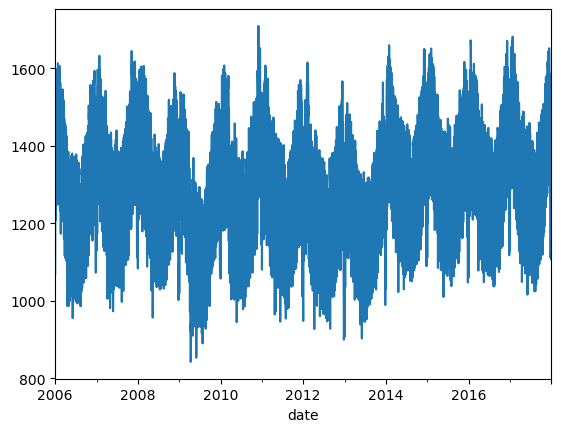

In [195]:
df.consumption.plot()

In [196]:
train = df.loc[:'2014']
test = df.loc['2015':]

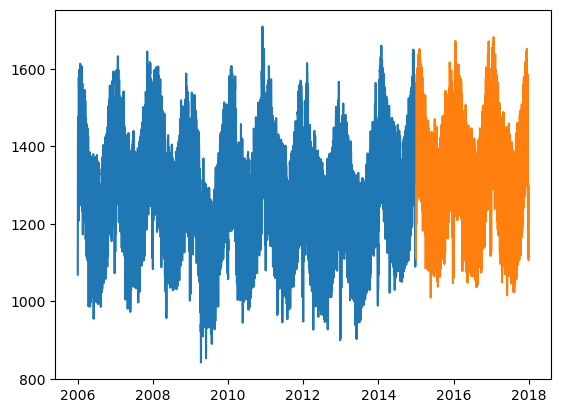

In [197]:
plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)
plt.show()


In [198]:
train.head()

,consumption,wind,solar,wind+solar,month,month_name,year
date,,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,1,January,2006
2006-01-02,1380.521,48.709,6.587,234.052,1,January,2006
2006-01-03,1442.533,48.709,6.587,234.052,1,January,2006
2006-01-04,1457.217,48.709,6.587,234.052,1,January,2006
2006-01-05,1477.131,48.709,6.587,234.052,1,January,2006


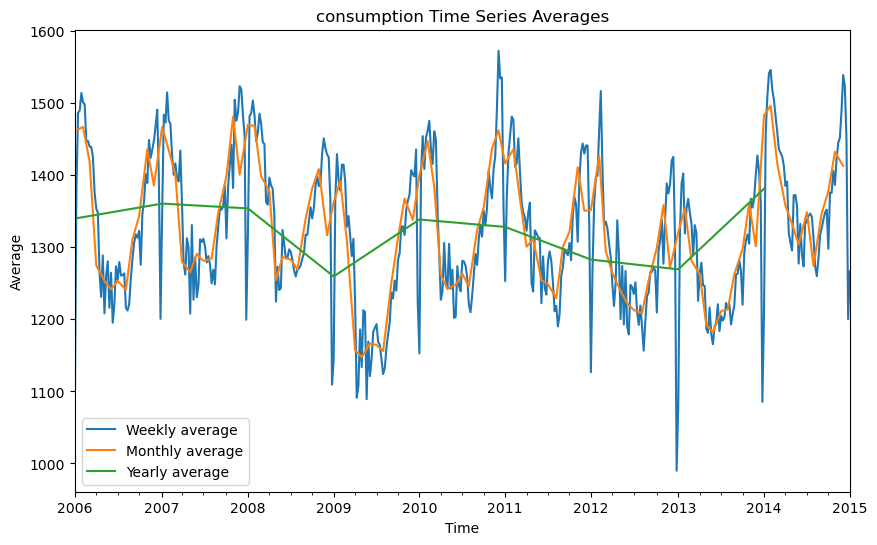

In [199]:
plot_averages(train,'consumption')

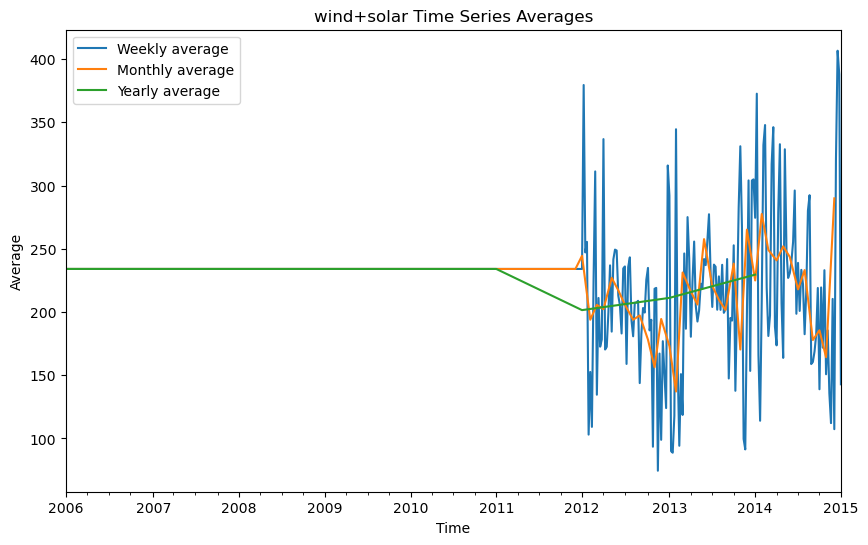

In [200]:
plot_averages(train,'wind+solar')

In [201]:
train_con=train[['consumption']]
train_con

,consumption
date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131
...,...
2014-12-27,1198.834
2014-12-28,1168.079
2014-12-29,1316.093


In [221]:
train_con.loc[:, 'consumption_bin'] = pd.qcut(train_con['consumption'], 4, labels=['low', 'med', 'med/high','high'])
train_con

/var/folders/wd/5_z1tvw94pv9x2ld8p_0dl2r0000gn/T/ipykernel_56603/1480525692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_con.loc[:, 'consumption_bin'] = pd.qcut(train_con['consumption'], 4, labels=['low', 'med', 'med/high','high'])


,consumption,consumption_bin
date,,
2006-01-01,1069.184,low
2006-01-02,1380.521,med/high
2006-01-03,1442.533,med/high
2006-01-04,1457.217,high
2006-01-05,1477.131,high
...,...,...
2014-12-27,1198.834,low
2014-12-28,1168.079,low
2014-12-29,1316.093,med


In [222]:
train_con.groupby('consumption_bin').mean()

,consumption
consumption_bin,
low,1090.450920
med,1291.952864
med/high,1396.677104
high,1516.399135


consumption_bin
low         AxesSubplot(0.125,0.2;0.775x0.68)
med         AxesSubplot(0.125,0.2;0.775x0.68)
med/high    AxesSubplot(0.125,0.2;0.775x0.68)
high        AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

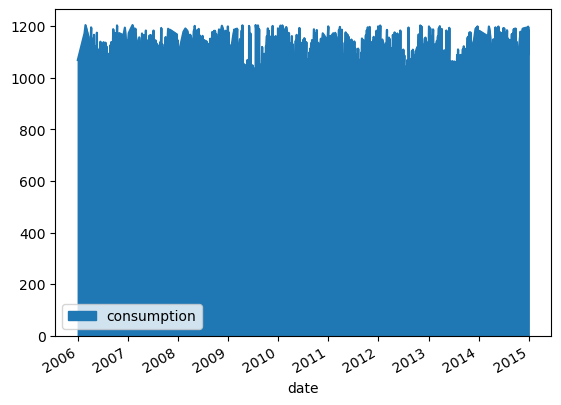

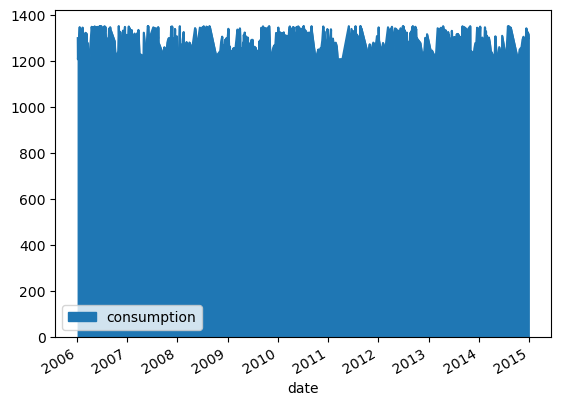

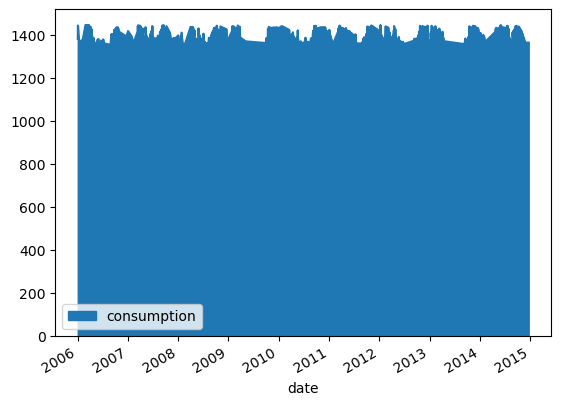

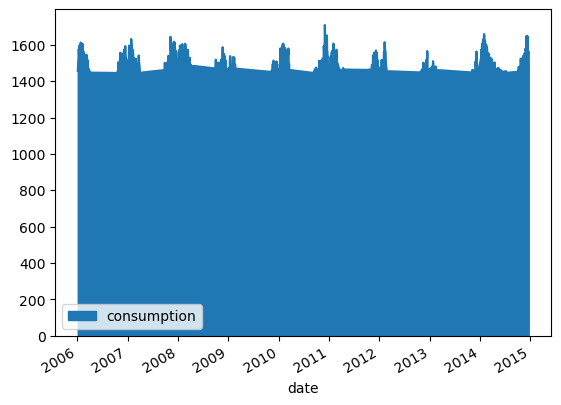

In [228]:
train_con.groupby('consumption_bin').plot.area()

In [235]:
train_ws=train[['wind+solar']]

In [236]:
train_ws.loc[:,'w+s_bin'] = pd.qcut(train_ws['wind+solar'], 4, labels=['low', 'med', 'med/high','high'])
train_ws

ValueError: Bin edges must be unique: array([ 21.478, 234.052, 234.052, 234.052, 663.359]).
You can drop duplicate edges by setting the 'duplicates' kwarg